- [Supervised](#Supervised)
    - [Simplest](##err)
    - [Linear Regression](##err)
    - [Decision Tree](##err)
    - [Perceptron](##err)
    - [Linear Discriminant Analysis](##err)
    - [Naive Bayes](##err)
    - [Support Vector Machine](##err)
    - [Kernel SVM](##err)
    - [Display all confusion Matrix](##err)
    - [Neural Network](##err)
- [Unsupervised](#err)
    - [Clustering](##err)
        - [K-mean](##err)
        - [OneClass SVM](##err)
    - [Decomposition](##err)
        - [Principal Component Analysis](##err)

In [34]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
df = sns.load_dataset('iris')

df = df[df['species'] != 'virginica']
df["species"] = df["species"].replace('setosa', -1)
df["species"] = df["species"].replace('versicolor', 1)

train, test = train_test_split(df, test_size=0.2) # 80-20 split

X_train = train.iloc[:,0:2]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,0:2]
y_test = test.iloc[:,-1]

In [36]:
def wb2mq(w, b):
    assert len(w) == 2, "This implementation only works in 2D"
    assert w[0] != 0 and w[1] != 0 and b != 0 # avoid edge cases for now
    return [w[0]/-w[1], b/-w[1]] # m and q

def params2boundary(w, b):
    m, q = wb2mq(w, b)
    print(f"m: {m}, q: {q}")
    return lambda x: m*x + q

# Supervised

## Simplest <a id="simplest"></a>

- **Main Idea**
    - Just guess randomly the parameters $w$ (weights) and $b$ (bias)
- **Assumption**
    - None
- **Formula**
    - None
- **Hyperparameters**
    - number of guesses
    - range of distribution of guess

## Linear Regression

- **Main Idea**
    - You interpret the underlying function as a Gaussian probability distribution (label is random variable of underlying) and thus find the parameters of a linear function that minimizes a loss (SSR for ex) with the log Maximum likelihood Estimation (same as minizing the Risk) or the Least Squares Method.
    - Closed-form solution
    - Sensitive to outliers
- **Assumption**
    - Linear relationship between X and Y
    - Homoskedasticity: Variance of Error is constant across X
    - Independance: Obsevation are IID (Independent and Identically Distributed => value of observation 1 doesn't depend on value of observation 2)
    - X and Y are normally distributed
- **Formula**
    - $y_i = \langle w, x_i \rangle + \epsilon_i, \;\; \epsilon \sim \mathcal{N}(0, \sigma^2)$
- **Hyperparameters**
    - None

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_df = sns.load_dataset('tips')

X = lr_df[['total_bill']]
y = lr_df['tip']



lr_model = LinearRegression()

lr_model.fit(X=X, y=y)


y_pred_lr = lr_model.predict(X=X)
mse = mean_squared_error(y, y_pred_lr)
print(mse)

1.036019442011377


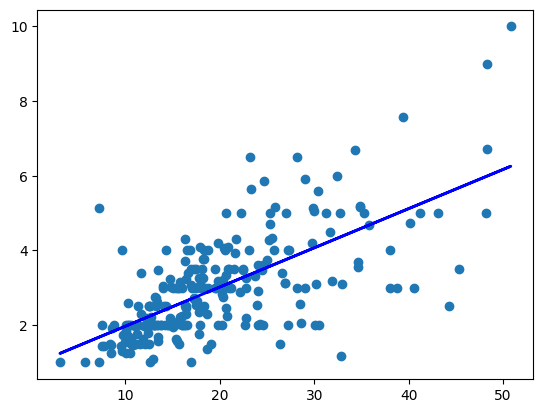

In [38]:
plt.scatter(X,y)
plt.plot(X, y_pred_lr, color='blue', linewidth=2, label='Predicted');

## Decision Tree

- **Main Idea**
    - Find the most discriminative features and give threshold and branches to minimizes the Risk. The split is done to maximize the quality.
    - Nice to visualize
    - closed-form
- **Assumption**
    - Separable
- **Formula**
    - None
- **Hyperparameters**
    - Criterion: "gini", "entropy", "log_loss"
    - max leaf, depth...

Accuracy: 0.95
Confusion Matrix:


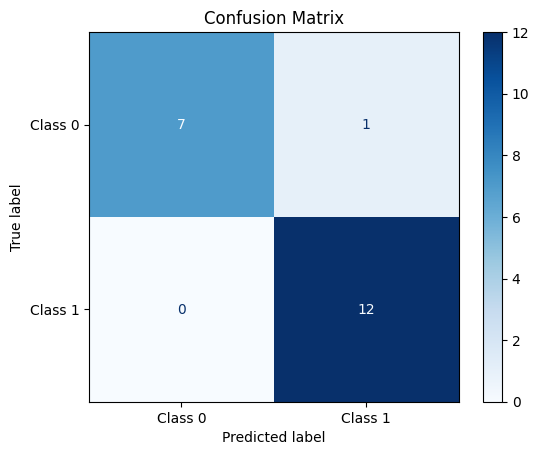

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree


dt_model = DecisionTreeClassifier()
dt_model.fit(X= X_train, y=y_train)

y_pred = dt_model.predict(X=X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
dt_cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

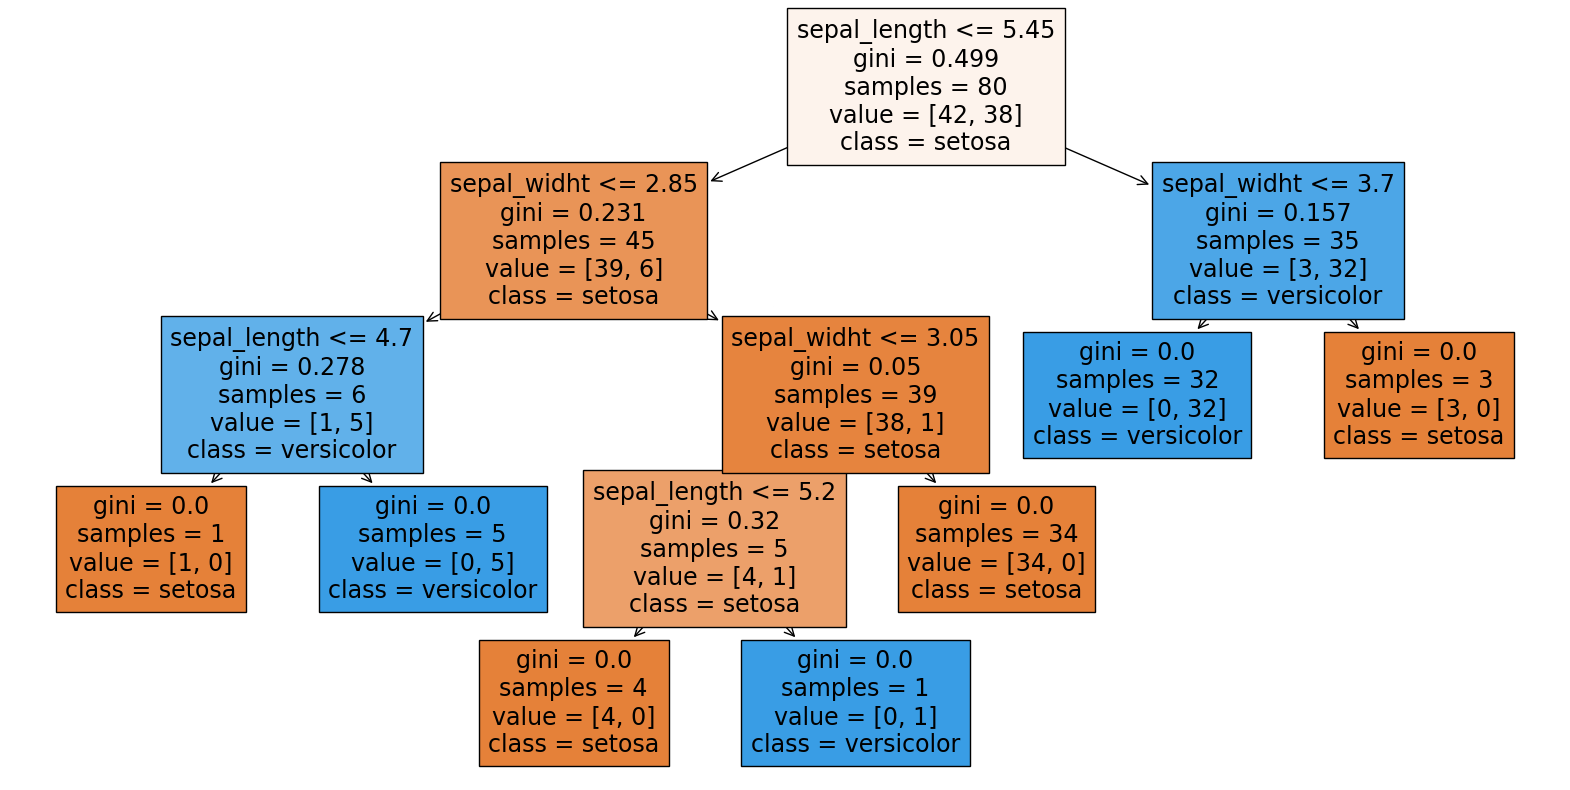

In [40]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=["sepal_length", "sepal_widht", "petal_length", "petal_width"], class_names=["setosa", "versicolor", "versicolor"],)
plt.show()

#yes = left
#no = right

## Perceptron

- **Main Idea**
    - You want to find a $w$ and $b$ parameters that splitted the data based on their label (boundary). You start with a random parametrization and you take the closest missclassified (negative margin), then you update the parameters to move the boudary so that it (the closest missclassified) become correctly classified. => for each missclassified you try to reduce the mistake at each time.
    - Iterative solution
- **Assumption**
    - Linearly separable data => otherwise won't stop => apply kernelization
- **Formula**
    - hyperplace = $\langle w\;,\;x\rangle + b = y, w\in R^k,\ in\ which\ w_i\ is\ not\ equal\ to\ 0\ for\ each\ i\ =\ (1,...,k), xb\in \mathbf{R}$
    - margin = $f(x) = y_i*(\langle w\;,\;x\rangle + b)$
    - update = $w^* = w+y_i*x_i $
- **Hyperparameters**
    - None

Accuracy: 1.00
Confusion Matrix:


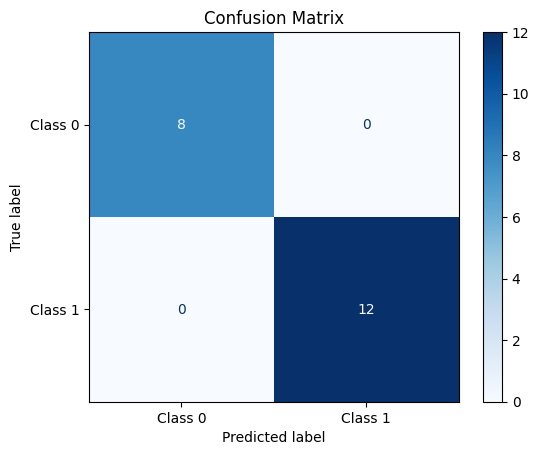

In [41]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

per_model = Perceptron()

per_model.fit(X=X_train,y=y_train)

y_pred = per_model.predict(X=X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
per_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=per_cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

w: [ 30.2 -48.2], b: -7.0
m: 0.6265560165975107, q: -0.1452282157676349


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

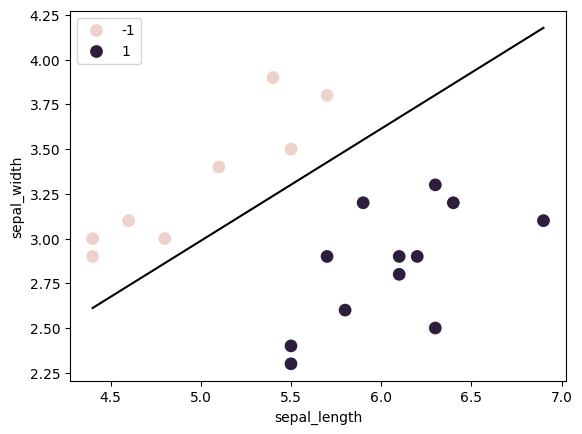

In [42]:
def todays_plot(): # learn to write your own
    sns.scatterplot(data=test, x="sepal_length", y="sepal_width",
      hue="species", # let's use different colors for the two classes
      s=100)

todays_plot()
perc_w = per_model.coef_[0]
perc_b = per_model.intercept_[0]
# we can use the splat to separate the bias (last element)
print(f"w: {perc_w}, b: {perc_b}")
perc_boundary = params2boundary(perc_w, perc_b)
sns.lineplot(x=X_test["sepal_length"], y=[perc_boundary(inp) for inp in X_test["sepal_length"]], color='black')

## Linear Discriminant Analysis

- **Main Idea**
    - Each observation is a mean of the label/cluster + a noise. The algorithm will map each observation to the class that mostly generated it by maximizing the conditional probability
    - Closed-form solution
    - Can handle non linearly separable data
- **Assumption**
    - Each class is an homogeneous cluster
    - All cluster are generated by gaussian
    - All Gaussian have same covariance
    - Noise term is assumed IID gaussian random $\epsilon \sim N(0,\Sigma)$
- **Limit**
  - Assumptions (rarely same covariance)
  - Covariance matrix grows quadratically with dimension
- **Formula**
    - for each class you need to compute:
        - its mean = $\hat \mu_{y} = \frac{1}{n_y} \sum_{i=1}^n x_i$
        - its covariance matrix (actually same for all class) = $\hat \Sigma = \frac{1}{n}\sum_{i=1}^n (x_i - \hat \mu_{yi})(x_i - \hat \mu_{yi})^T$
        - its probability $\hat \pi_i = \frac{n_i}{n}$
    - to predict the Y of an observation based on X
        - compute joint probability for each possible class and use Maximum Likelihood estimation 
        - Can be reformulate
$$h(x) = \begin{cases}
 class\:1\:if\:f(x)>0\\class\:2\:if\:f(x)<0
 \end{cases}$$
  $$f(x) = \langle w,x \rangle +b$$
  $$w=\hat{\Sigma}^{-1}(\hat{\mu_1}-\hat{\mu_2})$$
  $$b= \frac{1}{2}\hat{\mu}_2^T\hat{\Sigma}^{-1}\hat{\mu_2}-\frac{1}{2}\hat{\mu}_1^T\hat{\Sigma}^{-1}\hat{\mu_1}+log(\hat{\pi_1})-log(\hat{\pi_2})$$
- **Hyperparameters**
    - None

Accuracy: 1.00
Confusion Matrix:


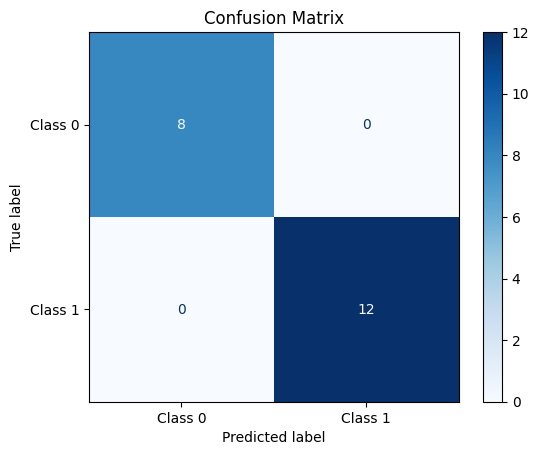

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X=X_train, y=y_train)

y_pred = lda_model.predict(X=X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
lda_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lda_cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

w: [ 10.28849548 -13.09508116], b: -15.64590735947525
m: 0.785676343802744, q: -1.1947926990792357


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

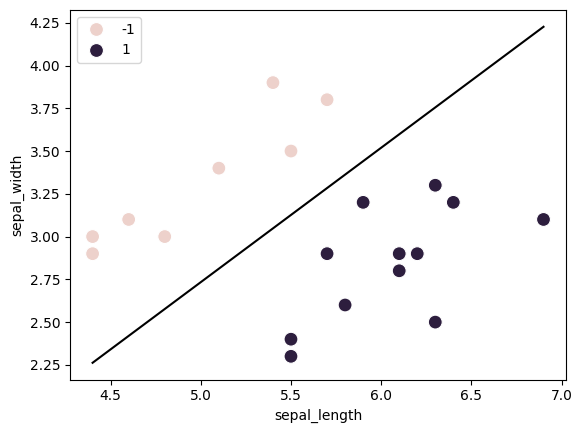

In [44]:
def todays_plot(): # learn to write your own
    sns.scatterplot(data=test, x="sepal_length", y="sepal_width",
      hue="species", # let's use different colors for the two classes
      s=100)

todays_plot()
w = lda_model.coef_[0]
b = lda_model.intercept_[0]
# we can use the splat to separate the bias (last element)
print(f"w: {w}, b: {b}")
boundary = params2boundary(w, b)
sns.lineplot(x=X_test["sepal_length"], y=[boundary(inp) for inp in X_test["sepal_length"]], color='black')

## Naive Bayes

- **Main Idea**
    - Based on Bayes Theorem.
    - Choose the distribution based on features distribution (Normal, Binomial (if more than 2 and discrete) or Bernoulli (if 2 and discrete))
    - Closed-form solution
    - Can handle non linearly separable data
- **Assumption**
    - Feature independence: Input features are conditionnaly independent given the class => Value of a features doesn't depend on other featues
    - Class Conditional Independence: For each class, 
- **Limit**
  - Naive because of the assumption
- **Formula**
    - Bayes rule:
$$P(A|B)=\frac{P(A)*P(B|A)}{P(B)}$$
$$Posterior=\frac{Prior*Likelihood}{Evidence}$$  
Ex: A = understood the content, B = Passes the test
$$Likelihood\:he\:understood\:given\:that\:he\:passed=\frac{probability\:he\:understood*Likelihood\:he\:passed\:given\:that\:he\:understood}{probability\:he\:passes}$$
we maximize conditional probability $argmax_y \left\{p(y|x)\right\}$, using the Bayes rule.
- Maximizing wrt y:  $p(y|x) = \frac{P(y)*P(x|y)}{P(x)}$
    - $P(x)$ can be dropped as we maximize wrt y
    - max wrt y: $p(y|x)$ = max wrt y: $P(y)*P(x|y)$
        - $P(y)$ = occurence of class divided by N
        - $P(x|y)= \frac{1}{\sqrt{(2\pi)^p*det(\Sigma)}}*e^{-\frac{1}{2}(x-\mu_y)^T\Sigma^{-1}(x-\mu_y)}*\pi_i$
- **Hyperparameters**
    - Model selection (which distribution for each feature)

Accuracy: 1.00
Confusion Matrix:


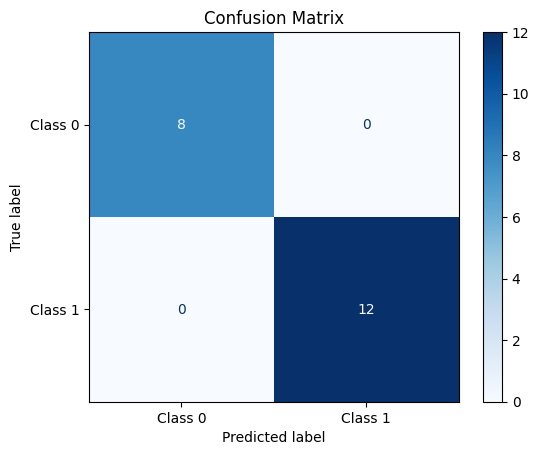

In [45]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

nb_model = GaussianNB()
nb_model.fit(X=X_train, y=y_train)

y_pred = nb_model.predict(X=X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
nb_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

- **Main Idea**
    - Try to find the boundary that maximizes the margin (distance between the boudary and its closest points)
    - Multi-objetive optimization problem: 1) maximize the margin and 2) minimize the margin violaton (Risk)
    - Closed-form solution
    - Can handle non linearly separable data thanks to slack function
- **Assumption**
    - Feature independence: Input features are conditionnaly independent given the class => Value of a features doesn't depend on other featues
    - Class Conditional Independence: For each class, 
- **Limit**
  - None
- **Formula**
    - with Squared Hinge Loss
\begin{aligned}
argmin_{w,b}\{\frac{1}{2}*\|w\|^2 + C * \frac{1}{n}\sum_{i=1}^{n} max\{0, 1 - y_i * (\langle w, x_i \rangle + b)\}^2\}
\end{aligned}
- **Hyperparameters**
    - C: slack-function = margin violation tolerance 
        - high = hard margin => small margin=> no violation (small bias high variance)
        - Small = soft margin => big margin => allow violation (high bias smmall variance)
    - loss function (not normal because need to be convec for the minimization): Hinge, Squared Hinge or Huber

Accuracy: 1.00
Confusion Matrix:


c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


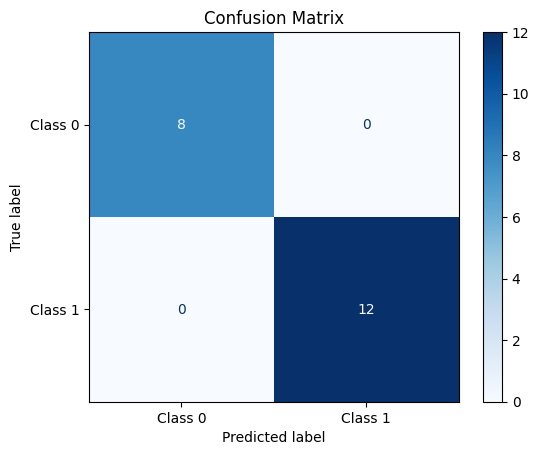

In [46]:
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

svc_model = LinearSVC(loss="squared_hinge", C=0.1) #C must be between 0 and infity
svc_model.fit(X=X_train, y=y_train)

y_pred = svc_model.predict(X=X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
svc_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

w: [ 0.73029139 -1.2299716 ], b: -0.16639193193479762
m: 0.5937465464881712, q: -0.1352811166241683


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

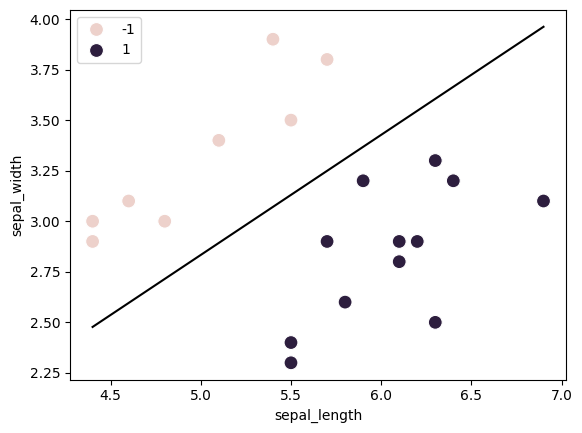

In [47]:
def todays_plot(): # learn to write your own
    sns.scatterplot(data=test, x="sepal_length", y="sepal_width",
      hue="species", # let's use different colors for the two classes
      s=100)

todays_plot()
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
# we can use the splat to separate the bias (last element)
print(f"w: {w}, b: {b}")
boundary = params2boundary(w, b)
sns.lineplot(x=X_test["sepal_length"], y=[boundary(inp) for inp in X_test["sepal_length"]], color='black')

## Kernel SVM

Accuracy: 1.00
Confusion Matrix:


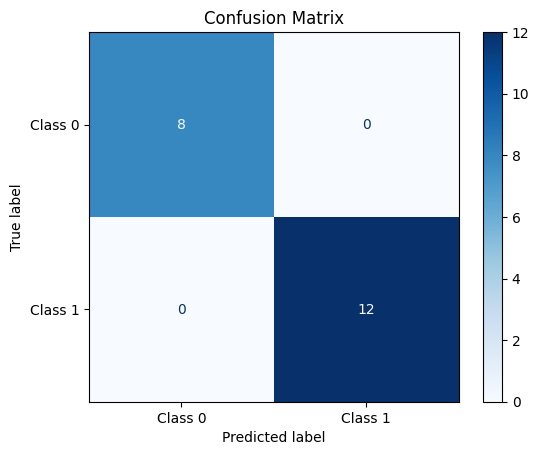

In [48]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

ksvc_model = SVC(C=1e-1, kernel="linear") #C must be between 0 and infity
ksvc_model.fit(X=X_train, y=y_train)

y_pred = ksvc_model.predict(X=X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
ksvc_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=ksvc_cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Display all confusion Matrix

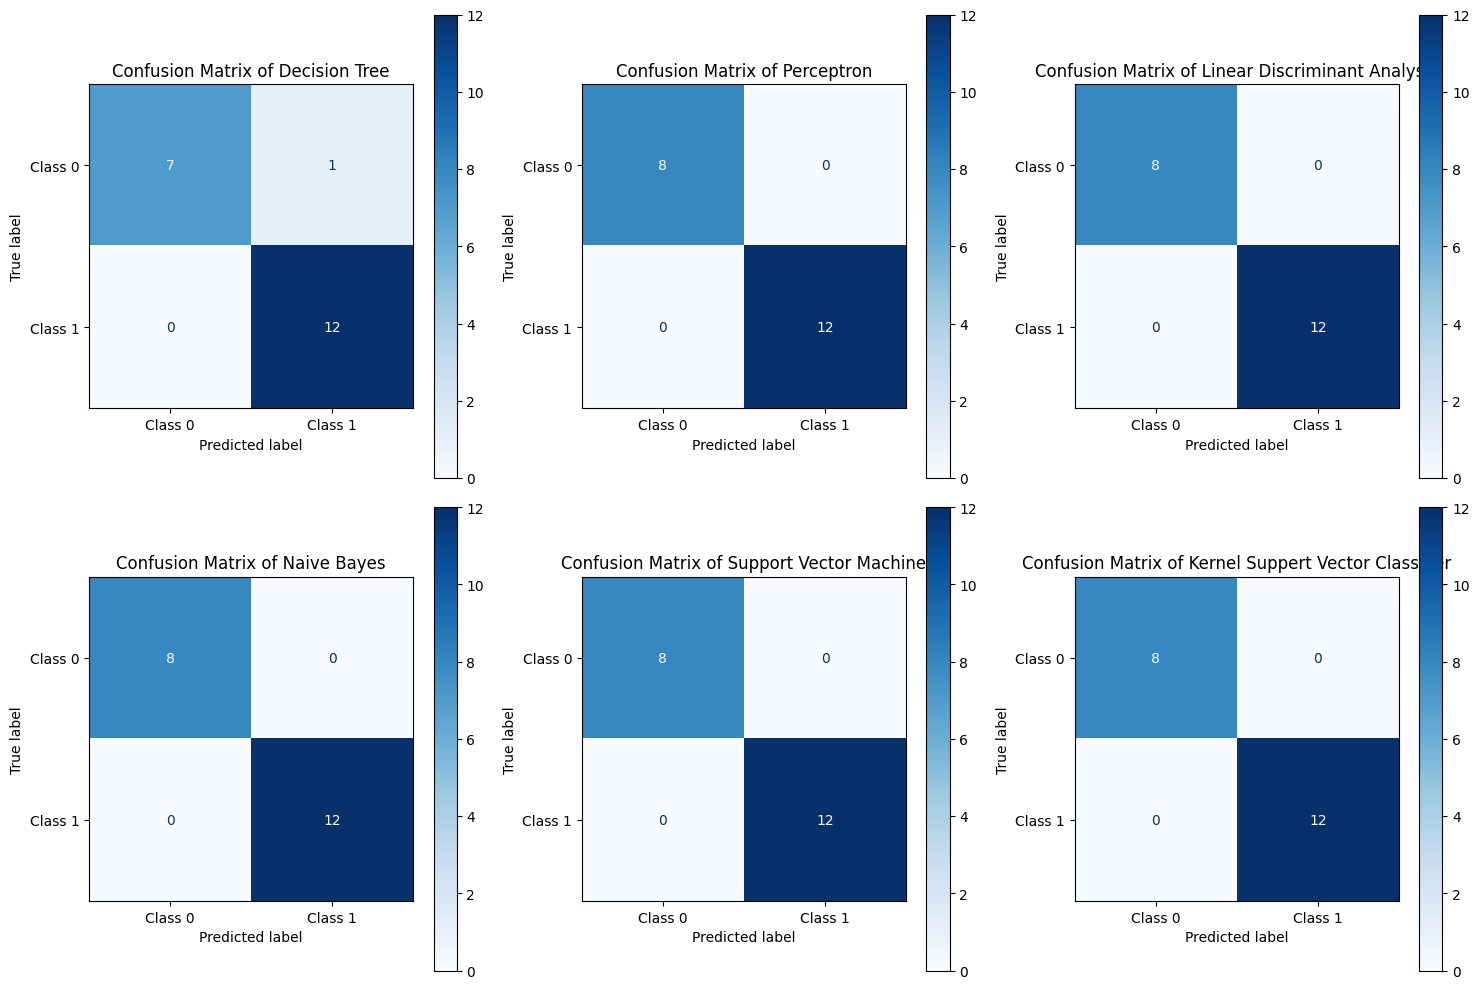

In [49]:
all_cms = {"Decision Tree":dt_cm, "Perceptron": per_cm, "Linear Discriminant Analysis": lda_cm, "Naive Bayes": nb_cm, "Support Vector Machine": svc_cm, "Kernel Suppert Vector Classifier": ksvc_cm}

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

for i, (name, cm) in enumerate(all_cms.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues', ax=axs[i])
    axs[i].set_title(f"Confusion Matrix of {name}")

# Adjust layout
plt.tight_layout()
plt.show()

## Neural Network

- Convolution layer = apply the filter/kernel/mask to have feature abstraction (low to high level)
- MaxPooling layer = reduce spatial size

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

In [51]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

"""
## Evaluate the trained model
"""
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7623 - loss: 0.7745 - val_accuracy: 0.9790 - val_loss: 0.0821
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9649 - loss: 0.1191 - val_accuracy: 0.9847 - val_loss: 0.0555
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9740 - loss: 0.0870 - val_accuracy: 0.9868 - val_loss: 0.0495
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9778 - loss: 0.0703 - val_accuracy: 0.9888 - val_loss: 0.0423
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9808 - loss: 0.0625 - val_accuracy: 0.9888 - val_loss: 0.0416
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9830 - loss: 0.0546 - val_accuracy: 0.9912 - val_loss: 0.0339
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9905 - val_loss: 0.0342
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9854 - loss: 0.0449 - val_accu

# Unsupervised

## Clustering

### K-mean

- **Explaination**
    -The K-means algorithm puts data points into cluster based on their distance between each other (maximizing distances between centroids and minimizing distance between points in a cluster and the assigned centroid). The user needs to define a number K of clusters and choose a similarity metric. As it's Unsupervised Learning we don't need labels. First K random points will be choosen as the centroids ("center" of the clusters). Then the distance between each points and the centroids will be calculated and the points will be assigned to the cluster with smallest distance. The algorithm will then calculate the new centroids by takings the means of all points in a cluster. This updates is repeated until there is no changes in centroids positions.
    - Unsupervised Learning => don't use y_train 
- **Hyperparameters**
    - number of cluster
    - initialisation if random or not
    - number of iterations

In [52]:
from sklearn.cluster import KMeans
import itertools

# Load the iris dataset
df = sns.load_dataset("iris")

# Split the data into train and test sets (80-20 split)
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Select only the first two feature columns for simplicity
X_train = train.iloc[:, 0:2]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, 0:2]
y_test = test.iloc[:, -1]

# Define species names
species_names = y_train.unique()

# Generate all possible label permutations
possible_codes = itertools.permutations(range(len(species_names)))
converters = [dict(zip(species_names, perm)) for perm in possible_codes]

# Function to find the best conversion
def cluster_to_class(model, fn_that_counts_misclassified, x_test, y_test):
    min_score = np.Infinity  # Initial high score to find the minimum
    right_conversion = None  # Placeholder for the right mapping
    for converter in converters:
        conv_y_test = y_test.replace(converter)  # Replace y_test labels by corresponding numbers
        misclassified = fn_that_counts_misclassified(model, x_test, conv_y_test)
        if misclassified < min_score:
            min_score = misclassified
            right_conversion = converter
    return right_conversion, min_score

# Train a KMeans model
kmean_model = KMeans(n_clusters=3, max_iter=1000, init="random", random_state=42)
kmean_model = kmean_model.fit(X_train)

# Define the function that counts misclassified samples
def score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    missclassified = (y_pred != y_test).sum()
    return missclassified

# Find the best conversion
right_conversion, min_score = cluster_to_class(kmean_model, score, X_test, y_test)

# Apply the best conversion to y_test
conv_y_test = y_test.replace(right_conversion)

# Get the number of misclassified samples using the best conversion
k_means_misclassified = score(kmean_model, X_test, conv_y_test)

# Print the results
print(f"There are {min_score} misclassified out of {len(y_test)}")
print(f"The right conversion is: {right_conversion}")


There are 3 misclassified out of 30
The right conversion is: {'setosa': 0, 'versicolor': 2, 'virginica': 1}


c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


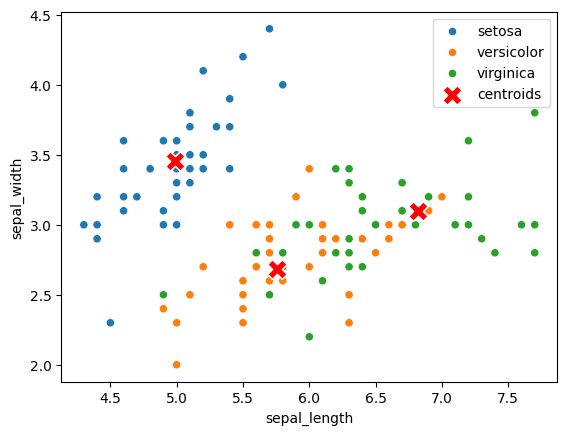

In [53]:
centers = pd.DataFrame(kmean_model.cluster_centers_, columns=["sepal_length", "sepal_width"])
kwargs = {'marker':'X', 'color':'r', 's':200, 'label':'centroids'}

sns.scatterplot(data=train, x="sepal_length", y="sepal_width", hue="species")
sns.scatterplot(data=centers, x="sepal_length", y="sepal_width", **kwargs)
plt.show();


### OneClass SVM

- Outliers detection
- just 2 classes

In [54]:
from sklearn.svm import OneClassSVM

model_OneClassSVM = OneClassSVM(kernel="rbf")
model_OneClassSVM.fit(X=X_train)

miss = score(model_OneClassSVM, X_test, y_test)
print(f"there are {miss} missclassifieds out of {y_test.shape[0]}.")

there are 30 missclassifieds out of 30.


## Decomposition

### Principal Component Analysis

- Dimensionality reduction be more human-readable

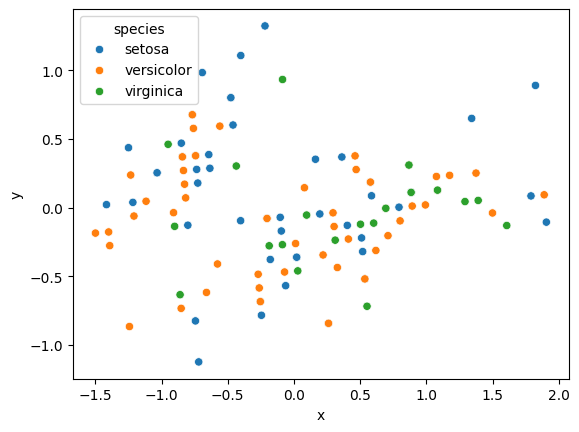

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X=X_train)
new_X = pca.transform(X_train)
plot_df = pd.DataFrame(new_X, columns=['x','y'])
plot_df['species'] = sns.load_dataset("iris")["species"] #to retrieve the species value
sns.scatterplot(data=plot_df, x='x', y='y', hue='species');